****Neural Network on Merged Data Minimizing Mean Absolute Percentage Error (MAPE)****

In [1]:
#Author: Bryant
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
import keras_tuner as kt

In [2]:
random.seed(12345)

In [3]:
# Importing Data
toyota = pd.read_csv('Merged_Data_with_lag_Lead_Sales.csv', header=0)
toyota.head(20)

,Week,Model,Sales,Region,Website_Visits.Organic.BAT,Website_Visits.Paid.BAT,CTA1.Organic.BAT,CTA1.Paid.BAT,CTA2.Organic.BAT,CTA2.Paid.BAT,...,Impressions.Unknown_Platform.Video,Impressions.NA.Video,Qualified_Actions.Connected_TV.Video,Qualified_Actions.Desktop.Video,Qualified_Actions.Mobile.Video,Qualified_Actions.Unknown_Platform.Video,Qualified_Actions.NA.Video,Week_of_Month,Month_Number,Fin_Year_End
0,2020-10-04,AF,81,Region 1,365,283,343,164,37,6,...,4544,0,0,3792,3184,0,0,1,10,0
1,2020-10-11,AF,84,Region 1,311,303,267,160,5,7,...,2379,0,0,4941,3688,0,0,2,10,0
2,2020-10-18,AF,86,Region 1,165,353,102,297,7,8,...,1405,0,0,5874,4041,0,0,3,10,0
3,2020-10-25,AF,101,Region 1,84,343,73,296,2,11,...,233,0,0,5833,3301,0,0,4,10,0
4,2020-11-01,AF,79,Region 1,89,325,88,295,1,9,...,38,0,0,4671,2645,0,0,1,11,0
5,2020-11-08,AF,68,Region 1,105,321,114,285,5,8,...,150,0,0,5312,3314,0,0,2,11,0
6,2020-11-15,AF,79,Region 1,112,331,108,341,5,11,...,151,0,0,5242,3166,0,0,3,11,0
7,2020-11-22,AF,74,Region 1,84,375,58,297,7,14,...,11,0,0,4272,3209,0,0,4,11,0
8,2020-11-29,AF,81,Region 1,76,280,58,257,5,5,...,1554,0,0,4576,2625,0,0,5,11,0
9,2020-12-06,AF,59,Region 1,69,313,69,263,5,11,...,39969,0,0,4571,3052,0,0,1,12,0


In [4]:
toyota = toyota[toyota.Region != 'Region 13']

In [5]:
toyota.shape

(1500, 99)

In [6]:
toyota.index = pd.to_datetime(toyota['Week'])
toyota = toyota.drop(['Week'], axis= 1)

In [7]:
toyota

,Model,Sales,Region,Website_Visits.Organic.BAT,Website_Visits.Paid.BAT,CTA1.Organic.BAT,CTA1.Paid.BAT,CTA2.Organic.BAT,CTA2.Paid.BAT,Website_Visits.Organic.TCOM,...,Impressions.Unknown_Platform.Video,Impressions.NA.Video,Qualified_Actions.Connected_TV.Video,Qualified_Actions.Desktop.Video,Qualified_Actions.Mobile.Video,Qualified_Actions.Unknown_Platform.Video,Qualified_Actions.NA.Video,Week_of_Month,Month_Number,Fin_Year_End
Week,,,,,,,,,,,,,,,,,,,,,
2020-10-04,AF,81,Region 1,365,283,343,164,37,6,1022,...,4544,0,0,3792,3184,0,0,1,10,0
2020-10-11,AF,84,Region 1,311,303,267,160,5,7,1017,...,2379,0,0,4941,3688,0,0,2,10,0
2020-10-18,AF,86,Region 1,165,353,102,297,7,8,1022,...,1405,0,0,5874,4041,0,0,3,10,0
2020-10-25,AF,101,Region 1,84,343,73,296,2,11,902,...,233,0,0,5833,3301,0,0,4,10,0
2020-11-01,AF,79,Region 1,89,325,88,295,1,9,1049,...,38,0,0,4671,2645,0,0,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-21,AW,116,Region 9,52,124,43,110,1,4,4854,...,124,0,0,518,394,0,0,3,2,0
2021-02-28,AW,141,Region 9,46,105,53,114,1,1,4072,...,97,0,0,579,550,0,0,4,2,0
2021-03-07,AW,151,Region 9,43,96,46,85,0,2,3771,...,75,0,0,451,504,0,0,1,3,1


In [8]:
# Selecting predictor variables
col_list = ['Sales','Model','Region','Website_Visits.Paid.BAT','CTA1.Paid.BAT','CTA2.Paid.BAT','Website_Visits.Paid.TCOM','CTA1.Organic.TCOM','CTA1.Paid.TCOM',
            'CTA2.Organic.TCOM','CTA2.Paid.TCOM','Lead_Sales.Category_7','Lead_Sales.Category_5','Lead_Sales.Category_1','Lead_Sales.Category_6','Lead_Sales.Category_4',
            'Lead_Sales.Category_9','Lead_Sales.Category_7_lag1','Lead_Sales.Category_7_lag4','Lead_Sales.Category_5_lag1','Lead_Sales.Category_5_lag4','Lead_Sales.Category_4_lag1',
            'Lead_Sales.Category_4_lag2','Lead_Sales.Category_4_lag3','Lead_Sales.Category_4_lag4','Lead_Sales.Category_9_lag2','Impressions.Connected_TV.Display',
            'Impressions.Desktop.Display','Impressions.Mobile.Display','Qualified_Actions.Mobile.Display','Qualified_Actions.NA.Search','Qualified_Actions.NA.Social',
            'Impressions.Connected_TV.Video','Impressions.Mobile.Video','Week_of_Month']

In [9]:
toyota = toyota[col_list]

In [10]:
len(col_list)

35

In [10]:
toyota.shape

(1500, 35)

In [11]:
# Variance Inflation Factor (VIF)
def vif_arr(df):
    vif = pd.DataFrame()
    df=sma.add_constant(df)
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return(vif)

In [12]:
# Dummy Variables for Model
dummies_model = pd.get_dummies(toyota.Model)
dummies_model

,AF,AH,AL,AR,AW
Week,,,,,
2020-10-04,1,0,0,0,0
2020-10-11,1,0,0,0,0
2020-10-18,1,0,0,0,0
2020-10-25,1,0,0,0,0
2020-11-01,1,0,0,0,0
...,...,...,...,...,...
2021-02-21,0,0,0,0,1
2021-02-28,0,0,0,0,1
2021-03-07,0,0,0,0,1


In [13]:
# Dummy Variables for Region (1-12, removing Region 13)
dummies_region = pd.get_dummies(toyota.Region)
dummies_region

,Region 1,Region 10,Region 11,Region 12,Region 2,Region 3,Region 4,Region 5,Region 6,Region 7,Region 8,Region 9
Week,,,,,,,,,,,,
2020-10-04,1,0,0,0,0,0,0,0,0,0,0,0
2020-10-11,1,0,0,0,0,0,0,0,0,0,0,0
2020-10-18,1,0,0,0,0,0,0,0,0,0,0,0
2020-10-25,1,0,0,0,0,0,0,0,0,0,0,0
2020-11-01,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-21,0,0,0,0,0,0,0,0,0,0,0,1
2021-02-28,0,0,0,0,0,0,0,0,0,0,0,1
2021-03-07,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
# Dummy Variables for Week_of_Month (1-5)
dummies_Week_of_Month = pd.get_dummies(toyota, columns=['Week_of_Month'])
dummies_Week_of_Month = dummies_Week_of_Month.loc[:,'Week_of_Month_1':'Week_of_Month_5']
dummies_Week_of_Month

,Week_of_Month_1,Week_of_Month_2,Week_of_Month_3,Week_of_Month_4,Week_of_Month_5
Week,,,,,
2020-10-04,1,0,0,0,0
2020-10-11,0,1,0,0,0
2020-10-18,0,0,1,0,0
2020-10-25,0,0,0,1,0
2020-11-01,1,0,0,0,0
...,...,...,...,...,...
2021-02-21,0,0,1,0,0
2021-02-28,0,0,0,1,0
2021-03-07,1,0,0,0,0


In [15]:
# # Dummy Variables for Fin_Year_End (1-12)
# dummies_Fin_Year_End = pd.get_dummies(toyota, columns=['Fin_Year_End'])
# dummies_Fin_Year_End = dummies_Fin_Year_End.loc[:,'Fin_Year_End_0':'Fin_Year_End_1']
# dummies_Fin_Year_End

In [16]:
# Replacing old categorical features with dummy variables
newtoyota = pd.concat([toyota,dummies_model,dummies_region,dummies_Week_of_Month],axis='columns')

del newtoyota['Model']
del newtoyota['Region']
del newtoyota['Week_of_Month']

In [17]:
# Filling NA values
newtoyota = newtoyota.fillna(0)
# Checking the replaced NA values
# newtoyota.loc[:,'positive_rate':'new_vaccinations']

In [18]:
# Checks for empty columns and removes them
newtoyota=newtoyota.loc[:, (newtoyota.sum(axis=0) != 0)]

In [19]:
newtoyota.shape

(1500, 54)

In [20]:
newtoyota.head()

,Sales,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,...,Region 5,Region 6,Region 7,Region 8,Region 9,Week_of_Month_1,Week_of_Month_2,Week_of_Month_3,Week_of_Month_4,Week_of_Month_5
Week,,,,,,,,,,,,,,,,,,,,,
2020-10-04,81,283,164,6,971,512,399,83,70,0,...,0,0,0,0,0,1,0,0,0,0
2020-10-11,84,303,160,7,973,489,347,72,54,3,...,0,0,0,0,0,0,1,0,0,0
2020-10-18,86,353,297,8,995,480,382,83,59,2,...,0,0,0,0,0,0,0,1,0,0
2020-10-25,101,343,296,11,737,455,244,67,35,1,...,0,0,0,0,0,0,0,0,1,0
2020-11-01,79,325,295,9,515,477,220,56,28,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
newtoyota.columns

Index(['Sales', 'Website_Visits.Paid.BAT', 'CTA1.Paid.BAT', 'CTA2.Paid.BAT',
       'Website_Visits.Paid.TCOM', 'CTA1.Organic.TCOM', 'CTA1.Paid.TCOM',
       'CTA2.Organic.TCOM', 'CTA2.Paid.TCOM', 'Lead_Sales.Category_7',
       'Lead_Sales.Category_5', 'Lead_Sales.Category_1',
       'Lead_Sales.Category_6', 'Lead_Sales.Category_4',
       'Lead_Sales.Category_9', 'Lead_Sales.Category_7_lag1',
       'Lead_Sales.Category_7_lag4', 'Lead_Sales.Category_5_lag1',
       'Lead_Sales.Category_5_lag4', 'Lead_Sales.Category_4_lag1',
       'Lead_Sales.Category_4_lag2', 'Lead_Sales.Category_4_lag3',
       'Lead_Sales.Category_4_lag4', 'Lead_Sales.Category_9_lag2',
       'Impressions.Connected_TV.Display', 'Impressions.Desktop.Display',
       'Impressions.Mobile.Display', 'Qualified_Actions.Mobile.Display',
       'Qualified_Actions.NA.Search', 'Qualified_Actions.NA.Social',
       'Impressions.Connected_TV.Video', 'Impressions.Mobile.Video', 'AF',
       'AH', 'AL', 'AR', 'AW', 'Region 1', 

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(newtoyota, test_size=0.3)

In [23]:
# # Split Training and Testing Data
# train = newtoyota.sample(frac = 0.7, random_state=0)
# test = newtoyota.drop(train.index)

In [24]:
# Correlation Matrix for Continuous Variables
correlation_matrix = train.loc[:,'Sales':'Impressions.Mobile.Video'].corr()
correlation_matrix

,Sales,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,...,Lead_Sales.Category_4_lag4,Lead_Sales.Category_9_lag2,Impressions.Connected_TV.Display,Impressions.Desktop.Display,Impressions.Mobile.Display,Qualified_Actions.Mobile.Display,Qualified_Actions.NA.Search,Qualified_Actions.NA.Social,Impressions.Connected_TV.Video,Impressions.Mobile.Video
Sales,1.000000,0.033459,-0.068194,0.039942,0.633945,0.340601,0.231581,0.165373,0.193756,0.305905,...,-0.012182,0.105751,-0.028748,0.159134,0.123316,0.190193,0.285954,-0.050278,0.095447,0.104020
Website_Visits.Paid.BAT,0.033459,1.000000,0.539721,0.442224,0.085438,0.000923,-0.064859,0.325028,0.308211,-0.040139,...,0.015507,-0.019790,0.090564,0.055633,0.027445,0.013056,0.162840,0.056291,-0.027925,-0.040188
CTA1.Paid.BAT,-0.068194,0.539721,1.000000,0.533680,-0.041518,0.022539,-0.047516,0.288118,0.259818,0.063022,...,0.032455,0.069810,0.128512,0.027684,-0.008199,-0.015319,0.162165,0.156207,0.063910,0.033582
CTA2.Paid.BAT,0.039942,0.442224,0.533680,1.000000,0.074075,0.037122,-0.010447,0.289446,0.306276,-0.152121,...,-0.033107,0.086234,0.026680,0.147637,0.112850,0.170109,0.251033,0.075238,0.073321,0.062288
Website_Visits.Paid.TCOM,0.633945,0.085438,-0.041518,0.074075,1.000000,0.629422,0.592716,0.546292,0.599251,0.423600,...,0.015469,0.022554,0.184037,0.192639,0.132182,0.138069,0.610299,0.209927,0.016999,0.057280
CTA1.Organic.TCOM,0.340601,0.000923,0.022539,0.037122,0.629422,1.000000,0.464818,0.582528,0.547853,0.493740,...,0.049145,0.038917,0.226529,0.124086,0.089245,-0.016144,0.318563,0.318607,0.014857,0.041039
CTA1.Paid.TCOM,0.231581,-0.064859,-0.047516,-0.010447,0.592716,0.464818,1.000000,0.411692,0.449916,0.481594,...,-0.026138,0.056555,0.190336,0.176048,0.119881,0.062704,0.321994,0.240259,0.109842,0.114174
CTA2.Organic.TCOM,0.165373,0.325028,0.288118,0.289446,0.546292,0.582528,0.411692,1.000000,0.960451,0.271779,...,0.044933,-0.058181,0.245934,0.175926,0.124373,0.064796,0.400104,0.269491,0.093246,0.094245
CTA2.Paid.TCOM,0.193756,0.308211,0.259818,0.306276,0.599251,0.547853,0.449916,0.960451,1.000000,0.274742,...,0.026457,-0.043414,0.229382,0.191965,0.120192,0.096107,0.495353,0.264395,0.147540,0.124379
Lead_Sales.Category_7,0.305905,-0.040139,0.063022,-0.152121,0.423600,0.493740,0.481594,0.271779,0.274742,1.000000,...,0.109745,0.059998,0.202568,0.132020,0.094015,0.022382,0.318548,0.188157,0.112391,0.087075


In [25]:
abscorr = correlation_matrix.iloc[correlation_matrix.Sales.abs().argsort()]

In [26]:
abscorr.sort_values('Sales', ascending=False, axis=0)

,Sales,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,...,Lead_Sales.Category_4_lag4,Lead_Sales.Category_9_lag2,Impressions.Connected_TV.Display,Impressions.Desktop.Display,Impressions.Mobile.Display,Qualified_Actions.Mobile.Display,Qualified_Actions.NA.Search,Qualified_Actions.NA.Social,Impressions.Connected_TV.Video,Impressions.Mobile.Video
Sales,1.000000,0.033459,-0.068194,0.039942,0.633945,0.340601,0.231581,0.165373,0.193756,0.305905,...,-0.012182,0.105751,-0.028748,0.159134,0.123316,0.190193,0.285954,-0.050278,0.095447,0.104020
Website_Visits.Paid.TCOM,0.633945,0.085438,-0.041518,0.074075,1.000000,0.629422,0.592716,0.546292,0.599251,0.423600,...,0.015469,0.022554,0.184037,0.192639,0.132182,0.138069,0.610299,0.209927,0.016999,0.057280
CTA1.Organic.TCOM,0.340601,0.000923,0.022539,0.037122,0.629422,1.000000,0.464818,0.582528,0.547853,0.493740,...,0.049145,0.038917,0.226529,0.124086,0.089245,-0.016144,0.318563,0.318607,0.014857,0.041039
Lead_Sales.Category_7,0.305905,-0.040139,0.063022,-0.152121,0.423600,0.493740,0.481594,0.271779,0.274742,1.000000,...,0.109745,0.059998,0.202568,0.132020,0.094015,0.022382,0.318548,0.188157,0.112391,0.087075
Lead_Sales.Category_7_lag1,0.295000,-0.029724,0.064650,-0.154389,0.408883,0.469902,0.423404,0.268171,0.263581,0.688336,...,0.080673,0.048333,0.125026,0.074978,0.036534,-0.029430,0.298919,0.182207,0.050709,0.059839
Qualified_Actions.NA.Search,0.285954,0.162840,0.162165,0.251033,0.610299,0.318563,0.321994,0.400104,0.495353,0.318548,...,0.100223,0.077228,0.184907,0.097253,0.003967,0.130625,1.000000,0.006524,0.014758,-0.007989
Lead_Sales.Category_1,0.237177,0.028071,0.078059,-0.107004,0.398251,0.446909,0.384577,0.279126,0.264974,0.646529,...,0.104821,0.048669,0.243211,0.065323,0.018044,-0.062287,0.346131,0.152461,0.045814,0.024923
CTA1.Paid.TCOM,0.231581,-0.064859,-0.047516,-0.010447,0.592716,0.464818,1.000000,0.411692,0.449916,0.481594,...,-0.026138,0.056555,0.190336,0.176048,0.119881,0.062704,0.321994,0.240259,0.109842,0.114174
Lead_Sales.Category_5,0.228818,0.077153,0.259891,0.131568,0.269252,0.285476,0.304546,0.117421,0.130798,0.544985,...,0.043498,0.102107,0.126122,0.135672,0.099357,0.062980,0.371777,0.144820,0.068041,0.083233
Lead_Sales.Category_7_lag4,0.226590,-0.036655,0.041752,-0.155679,0.409288,0.461407,0.336519,0.230896,0.226398,0.620035,...,0.155634,0.065268,0.048348,-0.061922,-0.108656,-0.092428,0.329204,0.212416,-0.067115,-0.069883


In [27]:
# Correlation for Continuous Variables Sorted by Sales Descending
correlation_matrix.sort_values('Sales', ascending=False, axis=0)

,Sales,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,...,Lead_Sales.Category_4_lag4,Lead_Sales.Category_9_lag2,Impressions.Connected_TV.Display,Impressions.Desktop.Display,Impressions.Mobile.Display,Qualified_Actions.Mobile.Display,Qualified_Actions.NA.Search,Qualified_Actions.NA.Social,Impressions.Connected_TV.Video,Impressions.Mobile.Video
Sales,1.000000,0.033459,-0.068194,0.039942,0.633945,0.340601,0.231581,0.165373,0.193756,0.305905,...,-0.012182,0.105751,-0.028748,0.159134,0.123316,0.190193,0.285954,-0.050278,0.095447,0.104020
Website_Visits.Paid.TCOM,0.633945,0.085438,-0.041518,0.074075,1.000000,0.629422,0.592716,0.546292,0.599251,0.423600,...,0.015469,0.022554,0.184037,0.192639,0.132182,0.138069,0.610299,0.209927,0.016999,0.057280
CTA1.Organic.TCOM,0.340601,0.000923,0.022539,0.037122,0.629422,1.000000,0.464818,0.582528,0.547853,0.493740,...,0.049145,0.038917,0.226529,0.124086,0.089245,-0.016144,0.318563,0.318607,0.014857,0.041039
Lead_Sales.Category_7,0.305905,-0.040139,0.063022,-0.152121,0.423600,0.493740,0.481594,0.271779,0.274742,1.000000,...,0.109745,0.059998,0.202568,0.132020,0.094015,0.022382,0.318548,0.188157,0.112391,0.087075
Lead_Sales.Category_7_lag1,0.295000,-0.029724,0.064650,-0.154389,0.408883,0.469902,0.423404,0.268171,0.263581,0.688336,...,0.080673,0.048333,0.125026,0.074978,0.036534,-0.029430,0.298919,0.182207,0.050709,0.059839
Qualified_Actions.NA.Search,0.285954,0.162840,0.162165,0.251033,0.610299,0.318563,0.321994,0.400104,0.495353,0.318548,...,0.100223,0.077228,0.184907,0.097253,0.003967,0.130625,1.000000,0.006524,0.014758,-0.007989
Lead_Sales.Category_1,0.237177,0.028071,0.078059,-0.107004,0.398251,0.446909,0.384577,0.279126,0.264974,0.646529,...,0.104821,0.048669,0.243211,0.065323,0.018044,-0.062287,0.346131,0.152461,0.045814,0.024923
CTA1.Paid.TCOM,0.231581,-0.064859,-0.047516,-0.010447,0.592716,0.464818,1.000000,0.411692,0.449916,0.481594,...,-0.026138,0.056555,0.190336,0.176048,0.119881,0.062704,0.321994,0.240259,0.109842,0.114174
Lead_Sales.Category_5,0.228818,0.077153,0.259891,0.131568,0.269252,0.285476,0.304546,0.117421,0.130798,0.544985,...,0.043498,0.102107,0.126122,0.135672,0.099357,0.062980,0.371777,0.144820,0.068041,0.083233
Lead_Sales.Category_7_lag4,0.226590,-0.036655,0.041752,-0.155679,0.409288,0.461407,0.336519,0.230896,0.226398,0.620035,...,0.155634,0.065268,0.048348,-0.061922,-0.108656,-0.092428,0.329204,0.212416,-0.067115,-0.069883


In [28]:
# Pairplots
# sns.pairplot(train[['Sales', 'Qualified_Actions.Mobile.Display', 'Qualified_Actions.NA.Social', 'Lead_Sales.Category_7_lag1', 'Lead_Sales.Category_5', 'CTA2.Paid.BAT', 
#             'Impressions.Connected_TV.Video', 'Impressions.Mobile.Video', 'Impressions.Connected_TV.Display', 'Lead_Sales.Category_5_lag4', 'Lead_Sales.Category_7_lag2', 
#             'Lead_Sales.Category_7', 'Website_Visits.Paid.BAT','Website_Visits.Organic.BAT','Lead_Sales.Category_5_lag1','Qualified_Actions.Mobile.Video', 
#             'Impressions.Desktop.Display', 'Impressions.Mobile.Display', 'Impressions.NA.Search', 'Impressions.Unknown_Platform.Video', 'Lead_Sales.Category_7_lag4', 
#             'Lead_Sales.Category_8_lag1', 'Lead_Sales.Category_9', 'Lead_Sales.Category_9_lag4']], diag_kind='kde')

In [29]:
# Statistics of Training Data
trainstat = train.describe()
trainstat.pop('Sales')
trainstat = trainstat.transpose()
trainstat = trainstat.loc['Website_Visits.Paid.BAT':'Impressions.Mobile.Video',:]

In [30]:
# Response Variable
trainlabel = train.pop('Sales')
testlabel = test.pop('Sales')

In [31]:
# Normalization
def normalize(x):
    return(x- trainstat['mean']) / trainstat['std']
norm_train = normalize(train.loc[:,'Website_Visits.Paid.BAT':'Impressions.Mobile.Video'])
norm_test = normalize(test.loc[:,'Website_Visits.Paid.BAT':'Impressions.Mobile.Video'])

In [32]:
trainlabel

Week
2020-12-06    214
2021-02-28    186
2021-02-07    129
2020-10-25    192
2020-11-22     54
             ... 
2021-02-28    170
2021-02-14    306
2020-12-13    213
2021-03-21     86
2021-02-28    418
Name: Sales, Length: 1050, dtype: int64

In [33]:
norm_train.head(5)

,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,Lead_Sales.Category_5,...,Lead_Sales.Category_4_lag4,Lead_Sales.Category_9_lag2,Impressions.Connected_TV.Display,Impressions.Desktop.Display,Impressions.Mobile.Display,Qualified_Actions.Mobile.Display,Qualified_Actions.NA.Search,Qualified_Actions.NA.Social,Impressions.Connected_TV.Video,Impressions.Mobile.Video
Week,,,,,,,,,,,,,,,,,,,,,
2020-12-06,1.400263,3.922810,1.823367,-0.025747,0.952804,0.789867,1.307879,1.429011,2.457702,1.919700,...,3.175089,-0.135688,-0.234740,0.105768,-0.292106,-0.687142,0.287156,1.890332,-0.145099,-0.504688
2021-02-28,1.424167,-0.267007,-0.742576,0.053718,-0.199057,-0.216848,0.093267,-0.039538,0.025767,-0.344606,...,-0.251266,-0.135688,-0.428606,0.287458,1.875809,-0.436922,-0.347233,-0.414068,-0.281353,1.018384
2021-02-07,-0.724821,-0.702921,-0.400450,0.557262,-0.120110,-0.273330,-0.441163,-0.216597,-0.582217,0.108255,...,-0.251266,-0.135688,-0.347584,0.246823,-0.657586,-0.743958,0.404479,-0.096871,-0.892276,-0.961035
2020-10-25,-0.335183,-0.620061,-0.229387,-1.054864,-0.979964,-0.899066,-0.765059,-0.706114,-1.190201,-1.250328,...,-0.251266,-0.135688,-0.259565,-0.487945,-0.476602,0.823360,-1.283010,-1.173709,-0.400112,-0.687084
2020-11-22,-0.911274,-0.810999,-0.913638,-0.300336,-0.681298,1.679186,-0.846033,-0.758190,2.153710,1.013977,...,-0.251266,-0.135688,-0.345101,0.920899,0.626100,1.572298,-0.845331,1.917040,0.329287,0.388238


In [34]:
# Adding the categorical variables back into the training data.
norm_train = pd.concat([norm_train,train.loc[:,'AF':]],axis='columns')
norm_test = pd.concat([norm_test,test.loc[:,'AF':]],axis='columns')

In [35]:
norm_train.head(5)

,Website_Visits.Paid.BAT,CTA1.Paid.BAT,CTA2.Paid.BAT,Website_Visits.Paid.TCOM,CTA1.Organic.TCOM,CTA1.Paid.TCOM,CTA2.Organic.TCOM,CTA2.Paid.TCOM,Lead_Sales.Category_7,Lead_Sales.Category_5,...,Region 5,Region 6,Region 7,Region 8,Region 9,Week_of_Month_1,Week_of_Month_2,Week_of_Month_3,Week_of_Month_4,Week_of_Month_5
Week,,,,,,,,,,,,,,,,,,,,,
2020-12-06,1.400263,3.922810,1.823367,-0.025747,0.952804,0.789867,1.307879,1.429011,2.457702,1.919700,...,0,0,0,0,0,1,0,0,0,0
2021-02-28,1.424167,-0.267007,-0.742576,0.053718,-0.199057,-0.216848,0.093267,-0.039538,0.025767,-0.344606,...,0,0,0,0,0,0,0,0,1,0
2021-02-07,-0.724821,-0.702921,-0.400450,0.557262,-0.120110,-0.273330,-0.441163,-0.216597,-0.582217,0.108255,...,0,0,0,0,0,1,0,0,0,0
2020-10-25,-0.335183,-0.620061,-0.229387,-1.054864,-0.979964,-0.899066,-0.765059,-0.706114,-1.190201,-1.250328,...,0,1,0,0,0,0,0,0,1,0
2020-11-22,-0.911274,-0.810999,-0.913638,-0.300336,-0.681298,1.679186,-0.846033,-0.758190,2.153710,1.013977,...,0,0,1,0,0,0,0,0,1,0


In [36]:
# Building Neural Network with Hyperparameter Tuning
def buildmodel(hp):
    nn = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        nn.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
    nn.add(layers.Dense(1, activation='linear'))
    nn.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2,1e-3,1e-4])),
        loss='mape',
        metrics=['mae', 'mape','mse'])
    return nn

In [37]:
tuner = kt.RandomSearch(buildmodel, objective = 'val_mape', max_trials = 10, executions_per_trial = 3, directory='finaltuning',project_name='tonly1')

In [38]:
# Patience is amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor ='val_loss', patience=10)

In [39]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [40]:
tuner.search(norm_train, trainlabel, epochs=50, validation_split=0.2, callbacks=[early_stop])

Trial 10 Complete [00h 00m 19s]
val_mape: 15.447954177856445

Best val_mape So Far: 13.798503875732422
Total elapsed time: 00h 04m 30s
INFO:tensorflow:Oracle triggered exit


In [41]:
tuner.results_summary()

Results summary
Results in finaltuning\tonly1
Showing 10 best trials
Objective(name='val_mape', direction='min')
Trial summary
Hyperparameters:
num_layers: 16
units_0: 352
units_1: 352
learning_rate: 0.01
units_2: 224
units_3: 224
units_4: 96
units_5: 416
units_6: 224
units_7: 256
units_8: 288
units_9: 352
units_10: 64
units_11: 416
units_12: 32
units_13: 32
units_14: 32
units_15: 32
Score: 13.798503875732422
Trial summary
Hyperparameters:
num_layers: 9
units_0: 512
units_1: 416
learning_rate: 0.001
units_2: 64
units_3: 224
units_4: 160
units_5: 384
units_6: 288
units_7: 384
units_8: 288
units_9: 448
units_10: 512
units_11: 416
units_12: 448
units_13: 224
units_14: 288
units_15: 320
Score: 13.866355578104654
Trial summary
Hyperparameters:
num_layers: 12
units_0: 320
units_1: 448
learning_rate: 0.001
units_2: 384
units_3: 96
units_4: 448
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
Score: 14.167104085286459
Trial summary
Hyperparameters:
num_laye

In [42]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps

def buildmodel():
    nn =keras.Sequential([
        layers.Dense(512, activation=tf.nn.relu, input_shape=[len(train.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    nn.compile(loss='mape',optimizer = optimizer,metrics=['mae', 'mape','mse'])
    return nn
nn = buildmodel()

nn.summary()

In [43]:
# Prints dots to show completion of one epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

**Finding the optimal number of epochs to train the model with the hyperparameters**

In [44]:
#Build best model with optimal hyperparameters
model = tuner.hypermodel.build(best_hps)      
history = model.fit(norm_train, trainlabel, epochs=50, validation_split = 0.2, callbacks =[PrintDot()])

val_mape_per_epoch = history.history['val_mape']
best_epoch = val_mape_per_epoch.index(min(val_mape_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
27/27 [==============================] - 1s 11ms/step - loss: 80.6556 - mae: 182.4076 - mape: 80.6556 - mse: 59029.1484 - val_loss: 40.7433 - val_mae: 112.9936 - val_mape: 40.7433 - val_mse: 34099.7188

.Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 34.1510 - mae: 87.5872 - mape: 34.1510 - mse: 24146.6699 - val_loss: 27.2214 - val_mae: 76.7801 - val_mape: 27.2214 - val_mse: 17879.3672
.Epoch 3/50
27/27 [==============================] - 0s 6ms/step - loss: 31.4585 - mae: 77.7070 - mape: 31.4585 - mse: 16750.8926 - val_loss: 42.5894 - val_mae: 113.7713 - val_mape: 42.5894 - val_mse: 25540.0762
.Epoch 4/50
27/27 [==============================] - 0s 6ms/step - loss: 26.4490 - mae: 65.6152 - mape: 26.4490 - mse: 12978.8740 - val_loss: 41.1595 - val_mae: 114.6625 - val_mape: 41.1595 - val_mse: 25640.1875
.Epoch 5/50
27/27 [==============================] - 0s 6ms/step - loss: 34.8671 - mae: 80.8182 - mape: 34.8671 - mse: 15467.9570 - val_loss: 34.1454 -

In [45]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(norm_train, trainlabel, epochs=best_epoch, validation_split = 0.2)

Epoch 1/50
27/27 [==============================] - 1s 13ms/step - loss: 202.3226 - mae: 343.0587 - mape: 202.3226 - mse: 814541.6250 - val_loss: 45.2115 - val_mae: 130.6998 - val_mape: 45.2115 - val_mse: 41125.5352
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 53.4108 - mae: 130.1361 - mape: 53.4108 - mse: 39427.3555 - val_loss: 36.5761 - val_mae: 108.7024 - val_mape: 36.5761 - val_mse: 31766.0117
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 30.4616 - mae: 79.2011 - mape: 30.4616 - mse: 20883.1504 - val_loss: 46.7919 - val_mae: 128.3822 - val_mape: 46.7919 - val_mse: 33324.7773
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 28.3488 - mae: 69.8632 - mape: 28.3488 - mse: 13724.9346 - val_loss: 23.8641 - val_mae: 65.7545 - val_mape: 23.8641 - val_mse: 11436.4004
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 22.0039 - mae: 52.0586 - mape: 22.0039 - mse: 7110.9341 - val_loss: 23.0963 - v

In [46]:
hypermodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 352)               19008     
_________________________________________________________________
dense_1 (Dense)              (None, 352)               124256    
_________________________________________________________________
dense_2 (Dense)              (None, 224)               79072     
_________________________________________________________________
dense_3 (Dense)              (None, 224)               50400     
_________________________________________________________________
dense_4 (Dense)              (None, 96)                21600     
_________________________________________________________________
dense_5 (Dense)              (None, 416)               40352     
_________________________________________________________________
dense_6 (Dense)              (None, 224)               9

In [47]:
#Training Results
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mape,mse,val_loss,val_mae,val_mape,val_mse,epoch
0,80.655609,182.407608,80.655609,59029.148438,40.743313,112.993614,40.743313,34099.718750,0
1,34.151012,87.587242,34.151012,24146.669922,27.221434,76.780090,27.221434,17879.367188,1
2,31.458534,77.707016,31.458534,16750.892578,42.589447,113.771332,42.589447,25540.076172,2
3,26.448997,65.615173,26.448997,12978.874023,41.159473,114.662498,41.159473,25640.187500,3
4,34.867085,80.818245,34.867085,15467.957031,34.145428,90.115570,34.145428,15880.635742,4


In [48]:
hist.tail()

,loss,mae,mape,mse,val_loss,val_mae,val_mape,val_mse,epoch
45,10.331941,23.943108,10.331941,1473.621338,14.794082,34.287212,14.794082,2592.863037,45
46,8.340920,18.356943,8.340920,854.491943,15.840557,36.450729,15.840557,2817.662598,46
47,10.582855,23.831648,10.582855,1329.324585,20.860352,44.446720,20.860352,3939.571045,47
48,10.891041,25.442041,10.891041,1599.825562,15.398784,34.446022,15.398784,2524.577881,48
49,9.500588,22.028776,9.500588,1347.852661,13.018479,30.398441,13.018479,2152.496582,49


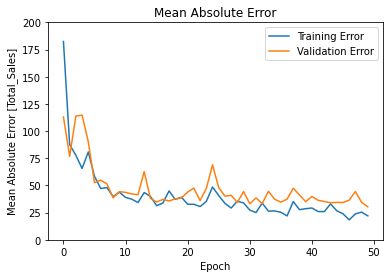

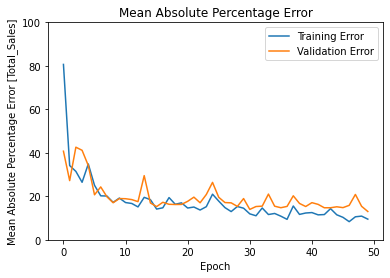

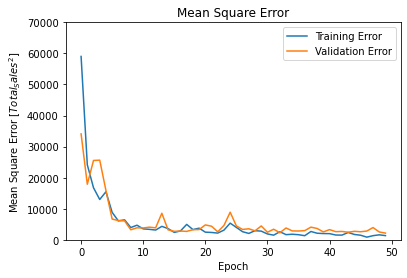

In [49]:
# Plotting KPI metrics
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error [Total_Sales]')
    plt.plot(hist['epoch'], hist['mae'],label='Training Error')
    plt.plot(hist['epoch'], hist['val_mae'],label='Validation Error')
    plt.legend()
    plt.title('Mean Absolute Error')
    plt.ylim([0,200])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Percentage Error [Total_Sales]')
    plt.plot(hist['epoch'], hist['mape'],label='Training Error')
    plt.plot(hist['epoch'], hist['val_mape'],label='Validation Error')
    plt.legend()
    plt.title('Mean Absolute Percentage Error')
    plt.ylim([0,100])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Total_Sales^2$]')
    plt.plot(hist['epoch'], hist['mse'],label='Training Error')
    plt.plot(hist['epoch'], hist['val_mse'],label='Validation Error')
    plt.legend()
    plt.title('Mean Square Error')
    plt.ylim([0,70000])
    

    
plot_history(history)

**The plots shows absolute error increasing for validation error. This is an example of overfitting.**

In [50]:
# Calculating Metrics
loss, mae, mape, mse = hypermodel.evaluate(norm_test, testlabel, verbose=0)

print('Testing Set Mean Absolute Error: {:5.2f} Total_Sales'.format(mae))
print('Testing Set Mean Absolute Percentage Error: {:5.2f} Total_Sales'.format(mape))
print('Testing Set Mean Squared Error: {:5.2f} Total_Sales'.format(mse))

Testing Set Mean Absolute Error: 33.33 Total_Sales
Testing Set Mean Absolute Percentage Error: 15.82 Total_Sales
Testing Set Mean Squared Error: 2435.39 Total_Sales


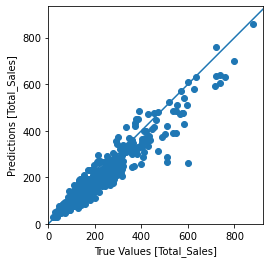

In [51]:
predictions = hypermodel.predict(norm_test).flatten()

plt.scatter(testlabel,predictions)
plt.xlabel('True Values [Total_Sales]')
plt.ylabel('Predictions [Total_Sales]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0,5000], [0,5000])

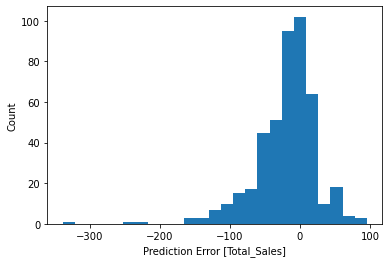

In [52]:
#Histogram of errors
error = predictions - testlabel
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Total_Sales]')
_ = plt.ylabel('Count')

In [53]:
hypermodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 352)               19008     
_________________________________________________________________
dense_1 (Dense)              (None, 352)               124256    
_________________________________________________________________
dense_2 (Dense)              (None, 224)               79072     
_________________________________________________________________
dense_3 (Dense)              (None, 224)               50400     
_________________________________________________________________
dense_4 (Dense)              (None, 96)                21600     
_________________________________________________________________
dense_5 (Dense)              (None, 416)               40352     
_________________________________________________________________
dense_6 (Dense)              (None, 224)               9

In [54]:
# Reindexing for plot
predictions1 = pd.Series(predictions)

testlabel1 = testlabel
testlabel1.index = predictions1.index

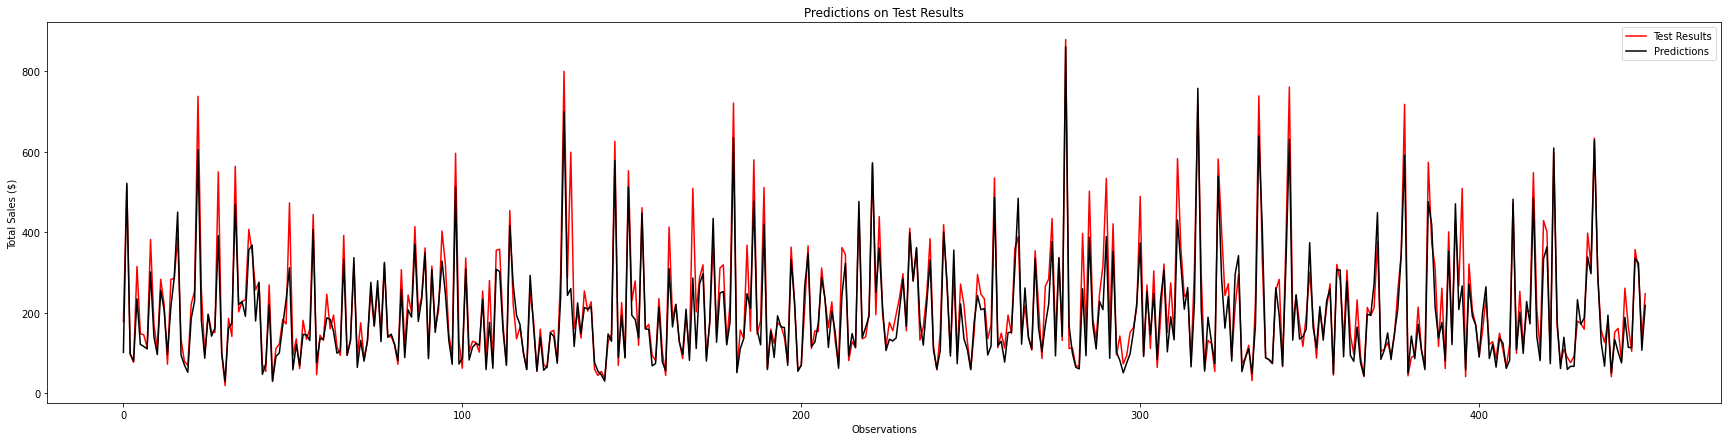

In [55]:
#Plotting predictions
x = list(range(0,450))
plt.figure(figsize=(30,7))
plt.plot(x, testlabel1, 'r', label='Test Results')
plt.plot(x, predictions1, '-k', label='Predictions')
plt.xlabel('Observations')
plt.ylabel('Total Sales ($)')
plt.title('Predictions on Test Results')
plt.legend()
plt.savefig('1C_Toyotaonly_Graph.pdf')
plt.show()